In [1]:
import numpy as np
import cv2
from sklearn.preprocessing import MinMaxScaler
from skimage.feature import greycomatrix, greycoprops
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import join

In [2]:
def GLCM(gray, props):
    data = []
    
    glcm = greycomatrix(gray,
                        distances=[8],
                        angles=[np.pi / 4],
                        levels=256,
                        symmetric=True,
                        normed=True)

    for prop in props:
        value = greycoprops(glcm, prop)
        data.append(value[0][0])
        
    return data

In [3]:
props = [
    'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM'
]

nomal_fld = './data2/nomal_data/nomal'
anomal_fld = './data2/anomal_data/anomal'

nomal_fs = listdir(nomal_fld)
anomal_fs = listdir(anomal_fld)

nomal_data = []
anomal_data = []

for nf, af in zip(nomal_fs, anomal_fs):
    n_img = io.imread(join(nomal_fld, nf))
    a_img = io.imread(join(anomal_fld, af))

    nomal_feature = GLCM(n_img, props)
    anomal_feature = GLCM(a_img, props)

    nomal_data.append(nomal_feature)
    anomal_data.append(anomal_feature)

nomal_df = pd.DataFrame(nomal_data, columns=props)
anomal_df = pd.DataFrame(anomal_data, columns=props)

nomal_df.to_csv('./feature_data/nomal.csv', index=False)
anomal_df.to_csv('./feature_data/anomal.csv', index=False)

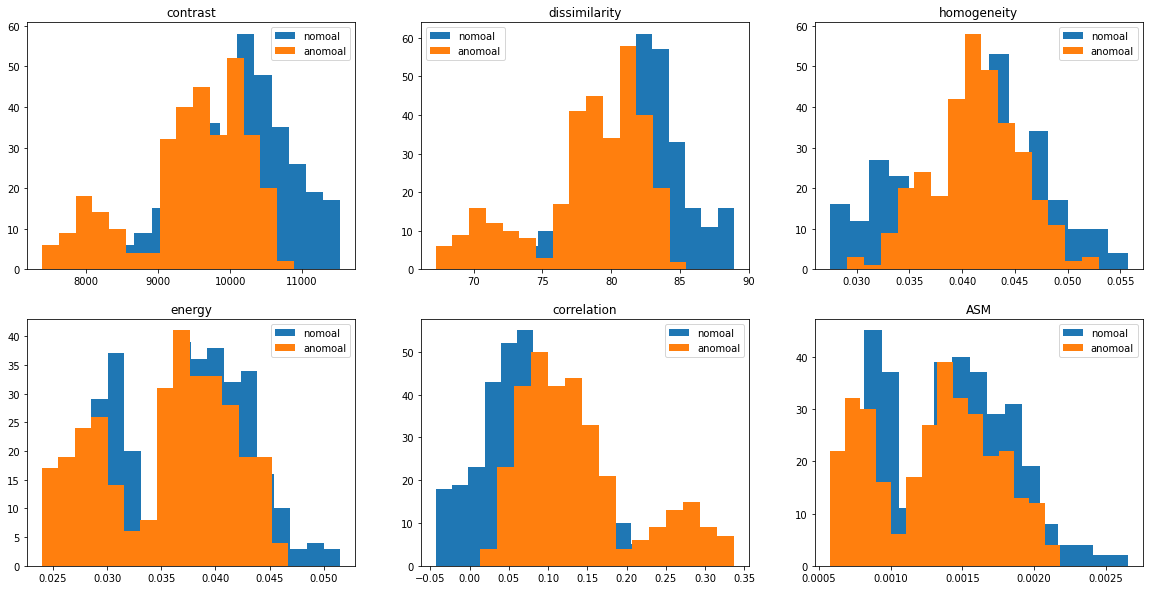

In [4]:
nomal_df = pd.read_csv('./feature_data/nomal.csv')
anomal_df = pd.read_csv('./feature_data/anomal.csv')

plt.figure(figsize=(20, 10))
for i, prop in enumerate(props):
    plt.subplot(2, 3, i+1)
    plt.title(prop)
#     plt.plot(nomal_df[prop].index, nomal_df[prop], label='nomoal')
#     plt.plot(anomal_df[prop].index, anomal_df[prop], label='anomoal')
    plt.hist(nomal_df[prop], 15, histtype='bar', label='nomoal')
    plt.hist(anomal_df[prop], 15, histtype='bar', label='anomoal')
    plt.legend()